# Datasets CleanUp and Analytics 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import itertools  
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
import tensorflow_hub as hub

### Import Datasets

In [2]:
df1 = pd.read_csv(".\Dataset\Dataset1.csv",header=0)
df2 = pd.read_csv(".\Dataset\Dataset2.csv",header=0)

columns = ['Title','Content','Label']

### Drop Empty Rows For Dataset 1

In [3]:
df1_cleaned = df1.copy()
df1_cleaned = df1_cleaned.iloc[:,1:]
df1_cleaned.columns = columns
df1_cleaned = df1_cleaned.dropna(how='any')

### Drop Empty Rows For Dataset 2

In [4]:
df2_cleaned = df2.copy()
df2_cleaned = df2_cleaned.iloc[:,1:4]
df2_cleaned.columns = columns
df2_cleaned = df2_cleaned.dropna(how='any')
df2_cleaned['Label'] = df2_cleaned['Label'].map({'FAKE':1,'REAL':0})

### Make a Backup Copy

In [5]:
df1_merged = df1_cleaned.copy()
df2_merged = df2_cleaned.copy()

### Merge both Datasets and Obtain Only Fake and Real Labelled Datasets

In [6]:
frames1 = [df1_merged, df2_merged]
df_merged1 = pd.concat(frames1)
df_real = df_merged1[df_merged1.Label ==0]
df_fake = df_merged1[df_merged1.Label ==1]

In [7]:
frames2 = [df_real, df_fake]
df_merged2 = pd.concat(frames2)
df_merged = df_merged2.copy()

In [8]:
df_merged = df_merged.drop_duplicates()
df_merged = df_merged.sample(frac=1)
df_merged = df_merged.reset_index(drop=True)
df_merged['Label'].unique()

array([0., 1.])

In [9]:
df_merged[df_merged['Label']==1].count()

Title      4860
Content    4860
Label      4860
dtype: int64

In [10]:
df_merged[df_merged['Label']==0].count()

Title      4945
Content    4945
Label      4945
dtype: int64

In [11]:
df_merged.count()

Title      9805
Content    9805
Label      9805
dtype: int64

### Save the Cleaned and Merged Dataset as (.npz) file

In [12]:
np.savez('Title_Data',inputs=df_merged.iloc[:,0],targets=df_merged.iloc[:,2])
np.savez('Content_Data',inputs=df_merged.iloc[:,1],targets=df_merged.iloc[:,2])

# Analytics on Dataset

In [13]:
df_merged_real = df_merged[df_merged.Label == 0]
df_merged_fake = df_merged[df_merged.Label == 1]

### Show Dataset Labels Ratio

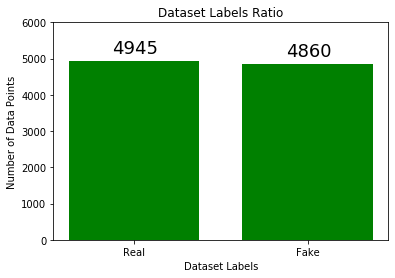

In [14]:
x_labels = ['Real', 'Fake']
y_values = [df_merged_real.shape[0],df_merged_fake.shape[0]]

fig, ax = plt.subplots() 

plt.bar(x_labels, y_values, align='center', width = 0.75, color='green')
plt.xlabel('Dataset Labels')
plt.ylabel('Number of Data Points')
plt.ylim((0, 6000))
plt.title('Dataset Labels Ratio')

for i, v in enumerate(x_labels):
    ax.text(i-0.125, y_values[i] + 200, y_values[i], fontsize=18)

plt.show()

### Show WordCloud and Ratios for Real News

There are 304344 words in the combination of all Real News.


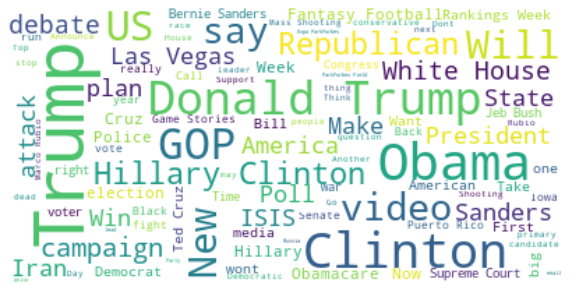

In [15]:
combined_real = []

for i in range(df_merged_real.shape[0]):
    sentence = re.sub('[^A-Za-z0-9 ]+', '', df_merged_real.iloc[i,0])
    combined_real.append(sentence)

texts = " ".join(text for text in combined_real)

print ("There are {} words in the combination of all Real News.".format(len(texts)))
stopwords = set(STOPWORDS)

wordcloud_real = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(texts)


# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

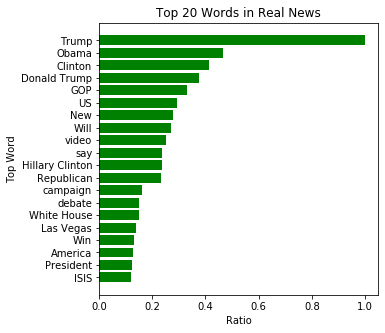

In [16]:
Top20RealWords = dict(itertools.islice(wordcloud_real.words_.items(), 20))

TopWords_real = []
Ratios_real = []

for name, age in Top20RealWords.items():
    TopWords_real.append(name)
    Ratios_real.append(age)

ind = np.arange(len(TopWords_real))    

plt.figure(figsize=[5,5])
plt.barh(TopWords_real,Ratios_real, align='center', color='green')
plt.xlabel('Ratio')
plt.ylabel('Top Word')
plt.gca().invert_yaxis()
plt.title('Top 20 Words in Real News')

plt.show()

### Show WordCloud and Ratios for Fake News

There are 313382 words in the combination of all Real News.


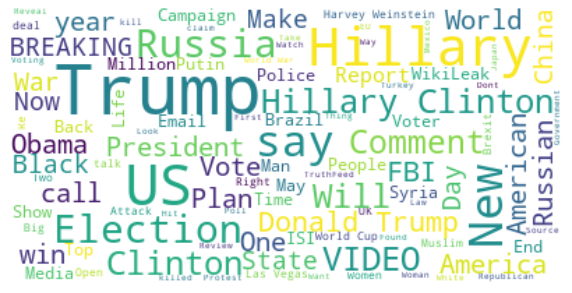

In [17]:
combined_fake = []

for i in range(df_merged_fake.shape[0]):
    sentence = re.sub('[^A-Za-z0-9 ]+', '', df_merged_fake.iloc[i,0])
    combined_fake.append(sentence)

texts = " ".join(text for text in combined_fake)

print ("There are {} words in the combination of all Real News.".format(len(texts)))
stopwords = set(STOPWORDS)

wordcloud_fake = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(texts)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

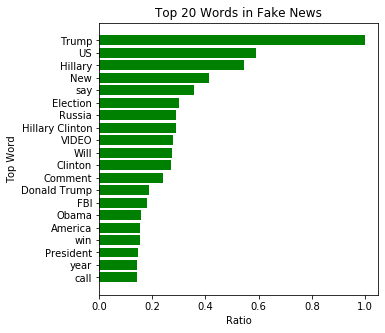

In [18]:
Top20FakeWords = dict(itertools.islice(wordcloud_fake.words_.items(), 20))

TopWords_fake = []
Ratios_fake = []

for name, age in Top20FakeWords.items():
    TopWords_fake.append(name)
    Ratios_fake.append(age)

plt.figure(figsize=[5,5])
plt.barh(TopWords_fake,Ratios_fake, align='center', color='green')
plt.xlabel('Ratio')
plt.ylabel('Top Word')
plt.gca().invert_yaxis()
plt.title('Top 20 Words in Fake News')

plt.show()